# Machine Learning
Case Study - Classification of Date Fruit

There are variety of fruits around the world. A date is a stone fruit, meaning it has a single seed surrounded by an outer fleshy fruit. They're grown on date palm trees, mostly found in dry areas.

Dates are of many types. Each of them having their own benefits. In this project, a few of date fruit breeds are described. The factors that determine the type of fruit are the external appearance features such as color, length, diameter, and shape.

The aim of this is to classify the types of date fruit, that are, Barhee, Deglet Nour, Sukkary, Rotab Mozafati, Ruthana, Safawi, and Sagai by using different machine learning algorithms.

In [1]:
#pip install xgboost

In [2]:
# importing important libraries

# Data Analysis libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing libraries
from sklearn.preprocessing import LabelEncoder

# Train_test_split library
from sklearn.model_selection import train_test_split

# Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Model evolution libraries
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel('Date_Fruit_Datasets.xlsx')
data.head()

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0  422163   2378.908    837.8484    645.6693        0.6373  733.1539   
1  338136   2085.144    723.8198    595.2073        0.5690  656.1464   
2  526843   2647.394    940.7379    715.3638        0.6494  819.0222   
3  416063   2351.210    827.9804    645.2988        0.6266  727.8378   
4  347562   2160.354    763.9877    582.8359        0.6465  665.2291   

   SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  KurtosisRR  KurtosisRG  \
0    0.9947       424428  0.7831        1.2976  ...      3.2370      2.9574   
1    0.9974       339014  0.7795        1.2161  ...      2.6228      2.6350   
2    0.9962       528876  0.7657        1.3150  ...      3.7516      3.8611   
3    0.9948       418255  0.7759        1.2831  ...      5.0401      8.6136   
4    0.9908       350797  0.7569        1.3108  ...      2.7016      2.9761   

   KurtosisRB    EntropyRR    EntropyRG    EntropyRB  ALLdaub4RR  ALLdaub4RG  \
0      4.2287 -59191263232 -50714214400 -39922372608     58.7255     54.9554   
1      3.1704 -34233065472 -37462601728 -31477794816     50.0259     52.8168   
2      4.7192 -93948354560 -74738221056 -60311207936     65.4772     59.2860   
3      8.2618 -32074307584 -32060925952 -29575010304     43.3900     44.1259   
4      4.4146 -39980974080 -35980042240 -25593278464     52.7743     50.9080   

   ALLdaub4RB  Class  
0     47.8400  BERHI  
1     47.8315  BERHI  
2     51.9378  BERHI  
3     41.1882  BERHI  
4     42.6666  BERHI  

[5 rows x 35 columns]

In [4]:
# Shape(number of rows and columns) of dataset
data.shape

(898, 35)

In [5]:
# Dataset columns information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

# Data Cleaning

In [6]:
#Checking unique values in clase feature
data["Class"].unique()

array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

In [7]:
# Checking null values
data.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

# Data Analysis

In [8]:
data.describe()

AREA    PERIMETER   MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY  \
count     898.000000   898.000000   898.000000  898.000000    898.000000   
mean   298295.207127  2057.660953   750.811994  495.872785      0.737468   
std    107245.205337   410.012459   144.059326  114.268917      0.088727   
min      1987.000000   911.828000   336.722700    2.283200      0.344800   
25%    206948.000000  1726.091500   641.068650  404.684375      0.685625   
50%    319833.000000  2196.345450   791.363400  495.054850      0.754700   
75%    382573.000000  2389.716575   858.633750  589.031700      0.802150   
max    546063.000000  2811.997100  1222.723000  766.453600      1.000000   

          EQDIASQ    SOLIDITY    CONVEX_AREA      EXTENT  ASPECT_RATIO  ...  \
count  898.000000  898.000000     898.000000  898.000000    898.000000  ...   
mean   604.577938    0.981840  303845.592428    0.736267      2.131102  ...   
std    119.593888    0.018157  108815.656947    0.053745     17.820778  ...   
min     50.298400    0.836600    2257.000000    0.512300      1.065300  ...   
25%    513.317075    0.978825  210022.750000    0.705875      1.373725  ...   
50%    638.140950    0.987300  327207.000000    0.746950      1.524150  ...   
75%    697.930525    0.991800  388804.000000    0.775850      1.674750  ...   
max    833.827900    0.997400  552598.000000    0.856200    535.525700  ...   

           SkewRB  KurtosisRR  KurtosisRG  KurtosisRB     EntropyRR  \
count  898.000000  898.000000  898.000000  898.000000  8.980000e+02   
mean     0.250518    4.247845    5.110894    3.780928 -3.185021e+10   
std      0.632918    2.892357    3.745463    2.049831  2.037241e+10   
min     -1.029100    1.708200    1.607600    1.767200 -1.091224e+11   
25%     -0.196950    2.536625    2.508850    2.577275 -4.429444e+10   
50%      0.135550    3.069800    3.127800    3.080700 -2.826156e+10   
75%      0.593950    4.449850    7.320400    4.283125 -1.460482e+10   
max      3.092300   26.171100   26.736700   32.249500 -1.627316e+08   

          EntropyRG     EntropyRB  ALLdaub4RR  ALLdaub4RG  ALLdaub4RB  
count  8.980000e+02  8.980000e+02  898.000000  898.000000  898.000000  
mean  -2.901860e+10 -2.771876e+10   50.082888   48.805681   48.098393  
std    1.712952e+10  1.484137e+10   16.063125   14.125911   10.813862  
min   -9.261697e+10 -8.747177e+10   15.191100   20.524700   22.130000  
25%   -3.894638e+10 -3.564534e+10   38.224425   38.654525   39.250725  
50%   -2.620990e+10 -2.392928e+10   53.841300   50.337800   49.614100  
75%   -1.433105e+10 -1.660367e+10   63.063350   59.573600   56.666675  
max   -5.627727e+08 -4.370435e+08   79.828900   83.064900   74.104600  

[8 rows x 34 columns]

In [9]:
# Checking types of different values in class feature
date_type = data['Class'].value_counts()
date_type

DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: Class, dtype: int64

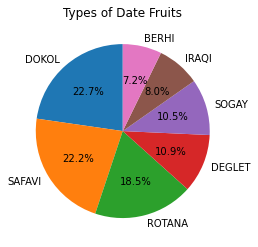

In [10]:
# Create a pie chart for Types of Date Fruits counts
labels = date_type.index.tolist()
sizes = date_type.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Types of Date Fruits')
#plt.legend(labels, loc='bottom')
plt.show()

In [11]:
corr = data.corr(method = 'pearson')
corr

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY  \
AREA           1.000000   0.956494    0.878893    0.954899     -0.370303   
PERIMETER      0.956494   1.000000    0.960734    0.859990     -0.166816   
MAJOR_AXIS     0.878893   0.960734    1.000000    0.721133      0.063090   
MINOR_AXIS     0.954899   0.859990    0.721133    1.000000     -0.607120   
ECCENTRICITY  -0.370303  -0.166816    0.063090   -0.607120      1.000000   
EQDIASQ        0.993243   0.959938    0.886277    0.948006     -0.335085   
SOLIDITY       0.027371  -0.133857   -0.166982    0.059613     -0.220434   
CONVEX_AREA    0.998886   0.963489    0.886948    0.951470     -0.356565   
EXTENT        -0.086286  -0.214632   -0.279951    0.028003     -0.342775   
ASPECT_RATIO  -0.095342   0.018308    0.111631   -0.150407      0.110238   
ROUNDNESS      0.044346  -0.235744   -0.355258    0.243655     -0.659626   
COMPACTNESS    0.315197   0.078554   -0.164403    0.551966     -0.917470   
SHAPEFACTOR_1 -0.124025  -0.011718    0.081976   -0.176214      0.114084   
SHAPEFACTOR_2 -0.861870  -0.934379   -0.959569   -0.736051     -0.026945   
SHAPEFACTOR_3  0.332349   0.103959   -0.136056    0.572201     -0.967224   
SHAPEFACTOR_4  0.039321  -0.036744   -0.048096   -0.004244     -0.020083   
MeanRR        -0.353447  -0.451033   -0.530236   -0.196257     -0.252334   
MeanRG        -0.380730  -0.468553   -0.538479   -0.231831     -0.238878   
MeanRB        -0.376241  -0.448371   -0.506743   -0.246280     -0.180566   
StdDevRR      -0.320764  -0.386137   -0.442289   -0.196623     -0.142801   
StdDevRG      -0.172480  -0.201908   -0.248626   -0.077724     -0.097034   
StdDevRB      -0.048223  -0.176466   -0.284034    0.095411     -0.393799   
SkewRR         0.376400   0.488147    0.551523    0.229831      0.223854   
SkewRG         0.401733   0.484734    0.550014    0.259649      0.184643   
SkewRB         0.433323   0.415364    0.412055    0.396219     -0.177619   
KurtosisRR     0.218253   0.313334    0.366579    0.093267      0.215284   
KurtosisRG     0.326335   0.398168    0.460468    0.189532      0.194135   
KurtosisRB     0.381096   0.364269    0.347940    0.354742     -0.179358   
EntropyRR     -0.359332  -0.266206   -0.146311   -0.466776      0.431537   
EntropyRG     -0.393124  -0.294308   -0.167972   -0.501442      0.463969   
EntropyRB     -0.506256  -0.416802   -0.297395   -0.585234      0.442189   
ALLdaub4RR    -0.353446  -0.451028   -0.530231   -0.196256     -0.252331   
ALLdaub4RG    -0.380747  -0.468571   -0.538497   -0.231847     -0.238875   
ALLdaub4RB    -0.376277  -0.448409   -0.506782   -0.246312     -0.180563   

                EQDIASQ  SOLIDITY  CONVEX_AREA    EXTENT  ASPECT_RATIO  ...  \
AREA           0.993243  0.027371     0.998886 -0.086286     -0.095342  ...   
PERIMETER      0.959938 -0.133857     0.963489 -0.214632      0.018308  ...   
MAJOR_AXIS     0.886277 -0.166982     0.886948 -0.279951      0.111631  ...   
MINOR_AXIS     0.948006  0.059613     0.951470  0.028003     -0.150407  ...   
ECCENTRICITY  -0.335085 -0.220434    -0.356565 -0.342775      0.110238  ...   
EQDIASQ        1.000000  0.018777     0.993397 -0.112353     -0.157370  ...   
SOLIDITY       0.018777  1.000000    -0.016449  0.392552     -0.189234  ...   
CONVEX_AREA    0.993397 -0.016449     1.000000 -0.107403     -0.095457  ...   
EXTENT        -0.112353  0.392552    -0.107403  1.000000      0.067207  ...   
ASPECT_RATIO  -0.157370 -0.189234    -0.095457  0.067207      1.000000  ...   
ROUNDNESS      0.035564  0.611010     0.015083  0.470357     -0.410407  ...   
COMPACTNESS    0.301535  0.384826     0.297794  0.365187     -0.422474  ...   
SHAPEFACTOR_1 -0.186715 -0.188307    -0.124221  0.072829      0.999515  ...   
SHAPEFACTOR_2 -0.887398  0.047237    -0.865527  0.216175     -0.055882  ...   
SHAPEFACTOR_3  0.304564  0.367759     0.313861  0.394855     -0.243065  ...   
SHAPEFACTOR_4  0.037291  0.874596     0.005152  0.229890     -0.134463  ...   
MeanRR        -

In [12]:
plt.figure(figsize=(18,18), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

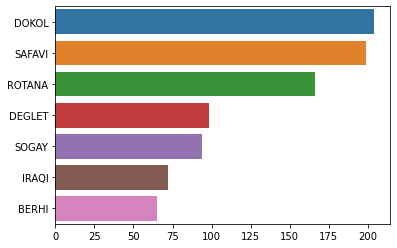

In [13]:
#Plotting a bars of different types of date fruits
sns.barplot(y= data["Class"].value_counts().index, x=data['Class'].value_counts().values);

<AxesSubplot:xlabel='AREA', ylabel='PERIMETER'>

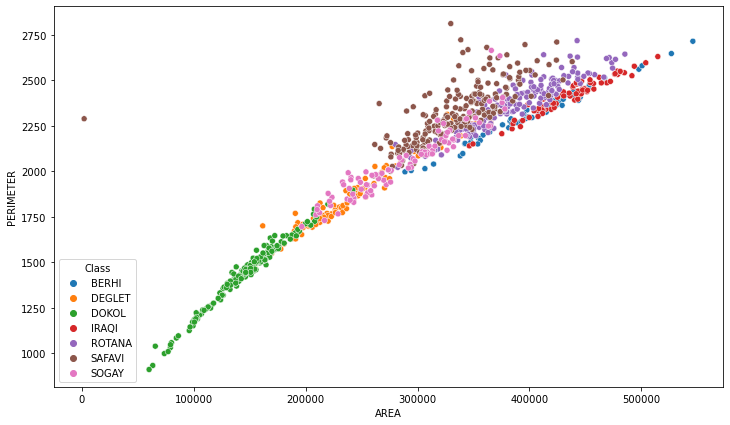

In [14]:
# Plotted scatter plot between "Area" and "Perimeter" of date fruit{"Classe label"}
plt.figure(figsize=(12,7))
sns.scatterplot(x="AREA", y = "PERIMETER", hue="Class", data=data)

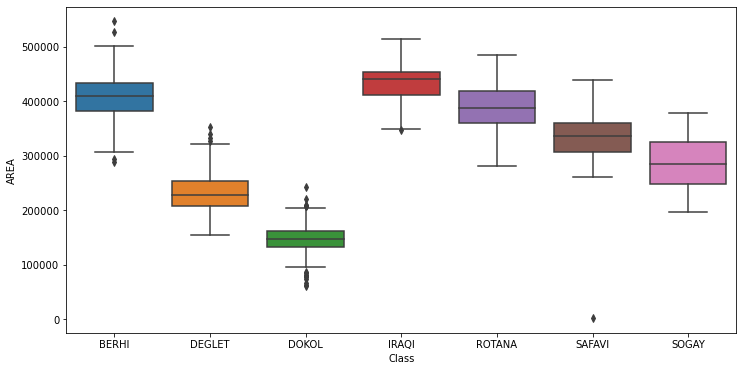

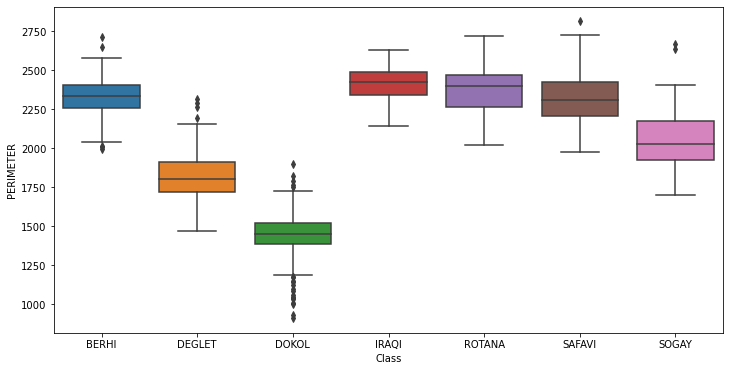

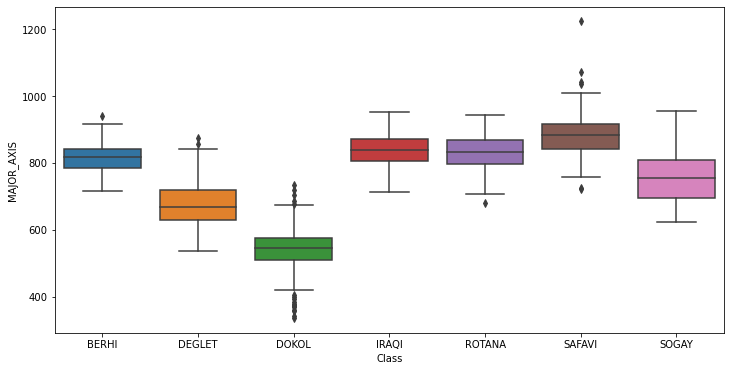

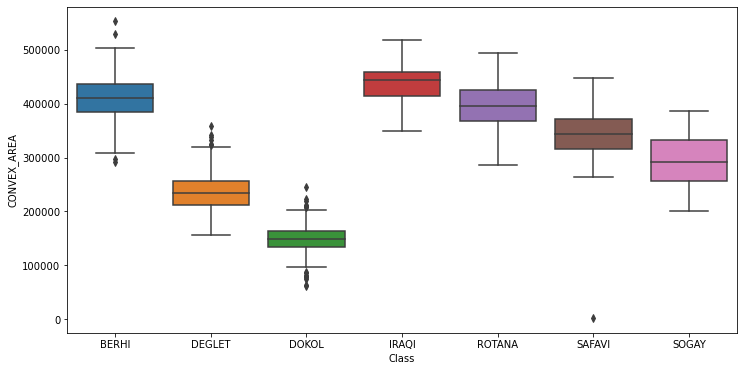

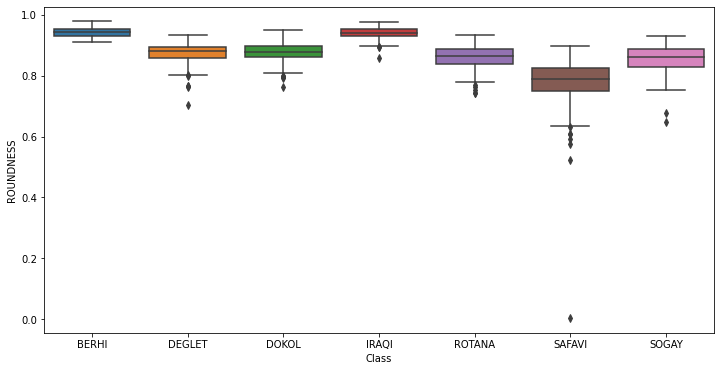

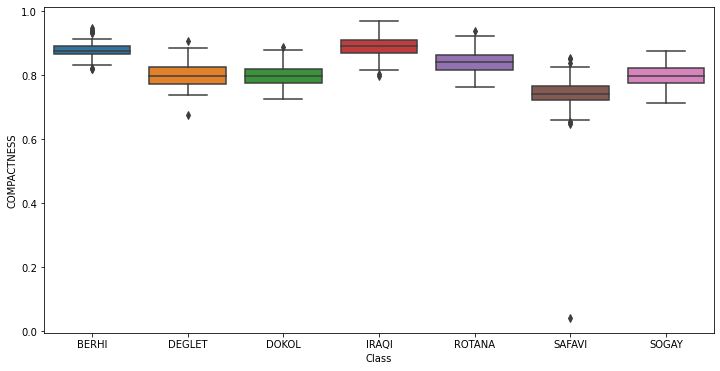

In [15]:
#Printing boxplot in one plot based on the following features
column = ['AREA','PERIMETER','MAJOR_AXIS','CONVEX_AREA','ROUNDNESS','COMPACTNESS']
for feature in column:
    plt.figure(figsize=(12,6))
    sns.boxplot(x="Class", y=feature, data=data)
    plt.show()

In [16]:
#Splitting Dataset into X and y for training
X = data.drop("Class",axis=1)
y = data['Class']
print("Shape of X: ",X.shape)
print("Shape of y: ",y.shape)

Shape of X:  (898, 34)
Shape of y:  (898,)


In [17]:
# Using Label Encoder for converting categorical values to numerical values 
le = LabelEncoder()
y = le.fit_transform(y)


In [18]:
# Splitting data datese into X_train,X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=5)
print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X_test:  ",X_test.shape)
print("Shape of y_test:  ",y_test.shape)

Shape of X_train:  (673, 34)
Shape of y_train:  (673,)
Shape of X_test:   (225, 34)
Shape of y_test:   (225,)


# Logistic Regression

In [19]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([4, 5, 5, 4, 4, 5, 4, 5, 5, 5, 5, 6, 5, 4, 5, 4, 5, 2, 4, 4, 6, 6,
       4, 4, 4, 4, 2, 2, 4, 2, 4, 4, 4, 4, 4, 5, 3, 2, 4, 4, 6, 4, 5, 4,
       4, 4, 5, 3, 3, 4, 4, 6, 6, 5, 4, 4, 2, 6, 4, 2, 5, 2, 4, 3, 4, 2,
       5, 5, 3, 5, 2, 2, 3, 4, 3, 2, 4, 4, 2, 4, 4, 4, 5, 4, 4, 6, 6, 4,
       3, 6, 5, 6, 2, 3, 4, 5, 4, 2, 4, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 6,
       3, 5, 2, 6, 4, 2, 5, 4, 4, 3, 2, 6, 4, 4, 6, 5, 5, 6, 4, 2, 4, 4,
       5, 4, 6, 2, 4, 4, 3, 5, 5, 4, 4, 4, 4, 5, 2, 4, 5, 2, 4, 2, 4, 5,
       5, 4, 5, 5, 4, 2, 6, 4, 4, 4, 6, 5, 6, 3, 4, 4, 2, 3, 4, 2, 5, 5,
       2, 5, 5, 2, 3, 6, 4, 6, 6, 4, 4, 4, 3, 2, 2, 2, 2, 5, 2, 5, 4, 6,
       5, 5, 4, 3, 5, 5, 4, 6, 4, 4, 4, 3, 4, 4, 4, 5, 5, 5, 5, 4, 6, 6,
       4, 4, 5, 4, 2])

In [20]:
acc = accuracy_score(y_test, y_pred_lr)
prec = precision_score(y_test, y_pred_lr,average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='micro')
recall = recall_score(y_test, y_pred_lr, average='weighted')
results = pd.DataFrame([["Logistic Regression",acc,prec,recall,f1]],
                            columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.528889   0.484436  0.528889  0.528889


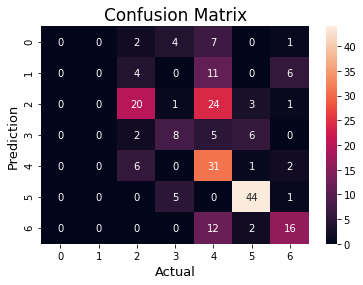

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_lr)

sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Decision Tree Classifier-Gini

In [22]:
dt = DecisionTreeClassifier(criterion = "gini")
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
acc = accuracy_score(y_test, y_pred_dt)
prec = precision_score(y_test, y_pred_dt,average='weighted')
f1 = f1_score(y_test, y_pred_dt, average='micro')
recall = recall_score(y_test, y_pred_dt, average='weighted')
model_results = pd.DataFrame([['Decision Tree Classifier-gini', acc, prec, recall, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                           Model  Accuracy  Precision    Recall  F1 Score
0            Logistic Regression  0.528889   0.484436  0.528889  0.528889
1  Decision Tree Classifier-gini  0.813333   0.821561  0.813333  0.813333


#  Decision Tree Classifier- Entropy

In [23]:
dt_e = DecisionTreeClassifier(criterion = "entropy")
dt_e.fit(X_train,y_train)
y_pred_dt_e = dt_e.predict(X_test)
acc = accuracy_score(y_test, y_pred_dt_e)
prec = precision_score(y_test, y_pred_dt_e,average='weighted')
f1 = f1_score(y_test, y_pred_dt_e, average='micro')
recall = recall_score(y_test, y_pred_dt_e, average='weighted')
model_results = pd.DataFrame([['Decision Tree Classifier-entropy', acc, prec, recall, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.528889   0.484436  0.528889  0.528889
1     Decision Tree Classifier-gini  0.813333   0.821561  0.813333  0.813333
2  Decision Tree Classifier-entropy  0.840000   0.851204  0.840000  0.840000


# Random Forest Classifier

In [24]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf,average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='micro')
recall = recall_score(y_test, y_pred_rf, average='weighted')
model_results = pd.DataFrame([['Random Forest Classifier', acc, prec, recall, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.528889   0.484436  0.528889  0.528889
1     Decision Tree Classifier-gini  0.813333   0.821561  0.813333  0.813333
2  Decision Tree Classifier-entropy  0.840000   0.851204  0.840000  0.840000
3          Random Forest Classifier  0.906667   0.912915  0.906667  0.906667


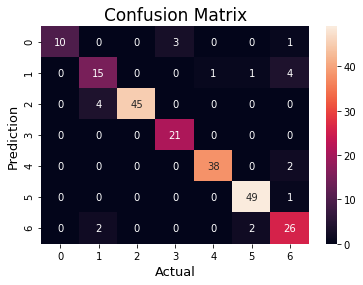

In [25]:
cm = confusion_matrix(y_test,y_pred_rf)

sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Support Vector Classification

In [26]:
model_svc = SVC()
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)
acc = accuracy_score(y_test, y_pred_svc)
prec = precision_score(y_test, y_pred_svc,average='weighted')
f1 = f1_score(y_test, y_pred_svc, average='micro')
recall = recall_score(y_test, y_pred_svc, average='weighted')
model_results = pd.DataFrame([['Support Vector Classifier', acc, prec, recall, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.528889   0.484436  0.528889  0.528889
1     Decision Tree Classifier-gini  0.813333   0.821561  0.813333  0.813333
2  Decision Tree Classifier-entropy  0.840000   0.851204  0.840000  0.840000
3          Random Forest Classifier  0.906667   0.912915  0.906667  0.906667
4         Support Vector Classifier  0.600000   0.526021  0.600000  0.600000


# KNeighborsClassifier(n_neighbors=5)

In [27]:
neighbor = KNeighborsClassifier(n_neighbors=5)
neighbor.fit(X_train, y_train)
y_pred_neighbor = neighbor.predict(X_test)
acc = accuracy_score(y_test, y_pred_neighbor)
prec = precision_score(y_test, y_pred_neighbor,average='weighted')
f1 = f1_score(y_test, y_pred_neighbor, average='micro')
recall = recall_score(y_test, y_pred_neighbor, average='weighted')
model_results = pd.DataFrame([['KNeighbors Classifier(n=5)', acc, prec, recall, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.528889   0.484436  0.528889  0.528889
1     Decision Tree Classifier-gini  0.813333   0.821561  0.813333  0.813333
2  Decision Tree Classifier-entropy  0.840000   0.851204  0.840000  0.840000
3          Random Forest Classifier  0.906667   0.912915  0.906667  0.906667
4         Support Vector Classifier  0.600000   0.526021  0.600000  0.600000
5        KNeighbors Classifier(n=5)  0.662222   0.686871  0.662222  0.662222


# KNeighborsClassifier(n_neighbors=7)

In [28]:
neighbor = KNeighborsClassifier(n_neighbors=7)
neighbor.fit(X_train, y_train)
y_pred_neighbor = neighbor.predict(X_test)
acc = accuracy_score(y_test, y_pred_neighbor)
prec = precision_score(y_test, y_pred_neighbor,average='weighted')
f1 = f1_score(y_test, y_pred_neighbor, average='micro')
recall = recall_score(y_test, y_pred_neighbor, average='weighted')
model_results = pd.DataFrame([['KNeighbors Classifier(n=7)', acc, prec, recall, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.528889   0.484436  0.528889  0.528889
1     Decision Tree Classifier-gini  0.813333   0.821561  0.813333  0.813333
2  Decision Tree Classifier-entropy  0.840000   0.851204  0.840000  0.840000
3          Random Forest Classifier  0.906667   0.912915  0.906667  0.906667
4         Support Vector Classifier  0.600000   0.526021  0.600000  0.600000
5        KNeighbors Classifier(n=5)  0.662222   0.686871  0.662222  0.662222
6        KNeighbors Classifier(n=7)  0.675556   0.685196  0.675556  0.675556


# Naive Bayes- GaussianNB

In [29]:
model_bnb = GaussianNB()
model_bnb.fit(X_train, y_train)
y_pred_bnb = model_bnb.predict(X_test)
acc = accuracy_score(y_test, y_pred_bnb)
prec = precision_score(y_test, y_pred_bnb,average='weighted')
f1 = f1_score(y_test, y_pred_bnb, average='micro')
recall = recall_score(y_test, y_pred_bnb, average='weighted')
model_results = pd.DataFrame([['GaussianNB Classifier', acc, prec, recall, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.528889   0.484436  0.528889  0.528889
1     Decision Tree Classifier-gini  0.813333   0.821561  0.813333  0.813333
2  Decision Tree Classifier-entropy  0.840000   0.851204  0.840000  0.840000
3          Random Forest Classifier  0.906667   0.912915  0.906667  0.906667
4         Support Vector Classifier  0.600000   0.526021  0.600000  0.600000
5        KNeighbors Classifier(n=5)  0.662222   0.686871  0.662222  0.662222
6        KNeighbors Classifier(n=7)  0.675556   0.685196  0.675556  0.675556
7             GaussianNB Classifier  0.520000   0.514893  0.520000  0.520000


# XGB Classifier 

In [30]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb,average='weighted')
f1 = f1_score(y_test, y_pred_xgb, average='micro')
recall = recall_score(y_test, y_pred_xgb, average='weighted')
model_results = pd.DataFrame([['XGB Classifier', acc, prec, recall, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.528889   0.484436  0.528889  0.528889
1     Decision Tree Classifier-gini  0.813333   0.821561  0.813333  0.813333
2  Decision Tree Classifier-entropy  0.840000   0.851204  0.840000  0.840000
3          Random Forest Classifier  0.906667   0.912915  0.906667  0.906667
4         Support Vector Classifier  0.600000   0.526021  0.600000  0.600000
5        KNeighbors Classifier(n=5)  0.662222   0.686871  0.662222  0.662222
6        KNeighbors Classifier(n=7)  0.675556   0.685196  0.675556  0.675556
7             GaussianNB Classifier  0.520000   0.514893  0.520000  0.520000
8                    XGB Classifier  0.911111   0.911517  0.911111  0.911111


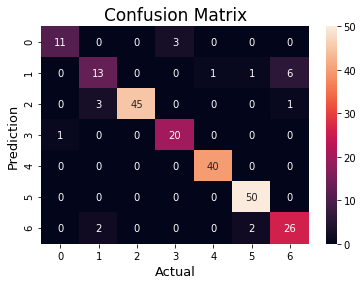

In [31]:
cm = confusion_matrix(y_test,y_pred_xgb)

sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Conclusion

# Input from user

In [34]:
AREA = float(input("Area : "))
PERIMETER = float(input("perimeter : "))
MAJOR_AXIS = float(input("Major_Axis : "))
MINOR_AXIS = float(input("Minor_Axis : "))
ECCENTRICITY = float(input("Eccentricity : "))
EQDIASQ = float(input("Eqdiasq : "))
SOLIDITY = float(input("SOLIDITY : ")) 
CONVEX_AREA = float(input("CONVEX_AREA : "))
EXTENT = float(input("EXTENT : "))
ASPECT_RATIO = float(input("ASPECT_RATIO : "))
ROUNDNESS = float(input("ROUNDNESS : "))
COMPACTNESS = float(input("COMPACTNESS : "))
SHAPEFACTOR_1 = float(input("SHAPEFACTOR_1 : "))
SHAPEFACTOR_2 = float(input("SHAPEFACTOR_2 : "))
SHAPEFACTOR_3 = float(input("SHAPEFACTOR_3 : "))
SHAPEFACTOR_4 = float(input("SHAPEFACTOR_4 : "))
MeanRR = float(input("MeanRR : "))
MeanRG = float(input("MeanRG : "))
MeanRB = float(input("MeanRB : "))
StdDevRR = float(input("StdDevRR : "))
StdDevRG = float(input("StdDevRG : "))
StdDevRB = float(input("StdDevRB : "))
SkewRR = float(input("SkewRR : "))
SkewRG = float(input("SkewRG : "))
SkewRB = float(input("SkewRB : "))
KurtosisRR = float(input("KurtosisRR : "))
KurtosisRG = float(input("KurtosisRG : "))
KurtosisRB = float(input("KurtosisRB : "))
EntropyRR = float(input("EntropyRR' : "))
EntropyRG = float(input("EntropyRG : "))
EntropyRB = float(input("EntropyRB : "))
ALLdaub4RR = float(input("ALLdaub4RR : "))
ALLdaub4RG = float(input("ALLdaub4RG : "))
ALLdaub4RB = float(input("ALLdaub4RB : "))


array_input_var = np.array([[AREA, PERIMETER, MAJOR_AXIS, MINOR_AXIS, ECCENTRICITY,
        EQDIASQ, SOLIDITY, CONVEX_AREA, EXTENT, ASPECT_RATIO,
        ROUNDNESS, COMPACTNESS, SHAPEFACTOR_1, SHAPEFACTOR_2,
        SHAPEFACTOR_3, SHAPEFACTOR_4, MeanRR, MeanRG, MeanRB,
        StdDevRR, StdDevRG, StdDevRB, SkewRR, SkewRG, SkewRB,
        KurtosisRR, KurtosisRG, KurtosisRB, EntropyRR, EntropyRG,
        EntropyRB, ALLdaub4RR, ALLdaub4RG, ALLdaub4RB]])


predictvalue = xgb.predict(array_input_var)

if predictvalue==0:
    print("*Given features are of type 'BERHI'*")
elif predictvalue == 1:
    print("*Given features are of type 'DEGLET'*")
elif predictvalue == 2:
    print("*Given features are of type 'DOKOL'*")
elif predictvalue==3:
    print("*Given features are of type  'IRAQI'*")
elif predictvalue==4:
    print("*Given features are of type 'ROTANA'*")
elif predictvalue==5:
    print("*Given features are of type 'SAFAVI'*")
elif predictvalue == 6:
    print("*Given features are of type 'SOGAY'*")
else:
    ("SOMEWHERE IS ERROR")

Area : 422163
perimeter : 2378.908
Major_Axis : 837.8484
Minor_Axis : 645.6693
Eccentricity : 0.6373
Eqdiasq : 733.1539
SOLIDITY : 0.9947
CONVEX_AREA : 424428
EXTENT : 0.7831
ASPECT_RATIO : 1.2976
ROUNDNESS : 0.9374
COMPACTNESS : 0.875
SHAPEFACTOR_1 : 0.002
SHAPEFACTOR_2 : 0.0015
SHAPEFACTOR_3 : 0.7657
SHAPEFACTOR_4 : 0.9937
MeanRR : 117.4466
MeanRG : 109.9085
MeanRB : 95.6774
StdDevRR : 265152
StdDevRG : 23.0687
StdDevRB : 30.123
SkewRR : -0.5661
SkewRG : -0.0114
SkewRB : 0.6019
KurtosisRR : 3.273
KurtosisRG : 2.9574
KurtosisRB : 4.2287
EntropyRR' : -59191263232
EntropyRG : -50714214400
EntropyRB : -39922372608
ALLdaub4RR : 58.7255
ALLdaub4RG : 54.9554
ALLdaub4RB : 47.84
*Given features are of type 'BERHI'*


In [32]:
#import pandas_profiling as pp
#profile = pp.ProfileReport(data)
#profile